In [40]:
# 1.) import necessary library and raw data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas_ta as ta
from datetime import datetime
warnings.filterwarnings('ignore')

In [41]:
st_return = pd.read_csv("strategy return_2.csv")
data1 = st_return.copy()

In [42]:
x = st_return[["Date","Cumulative DLS_LS","Cumulative RSI_L","Cumulative DLS_L"]]
x

,Date,Cumulative DLS_LS,Cumulative RSI_L,Cumulative DLS_L
0,2018-09-10,0.022373,0.005808,0.037468
1,2018-09-17,0.025480,0.022428,0.056775
2,2018-09-24,0.026047,0.011284,0.057388
3,2018-10-01,0.037652,0.001449,0.056424
4,2018-10-08,0.032665,-0.004363,0.011791
...,...,...,...,...
296,2024-05-13,1.269550,1.302873,2.108482
297,2024-05-20,1.255893,1.269309,2.023828
298,2024-05-27,1.295423,1.264184,2.073563
299,2024-06-03,1.322433,1.220446,2.084611


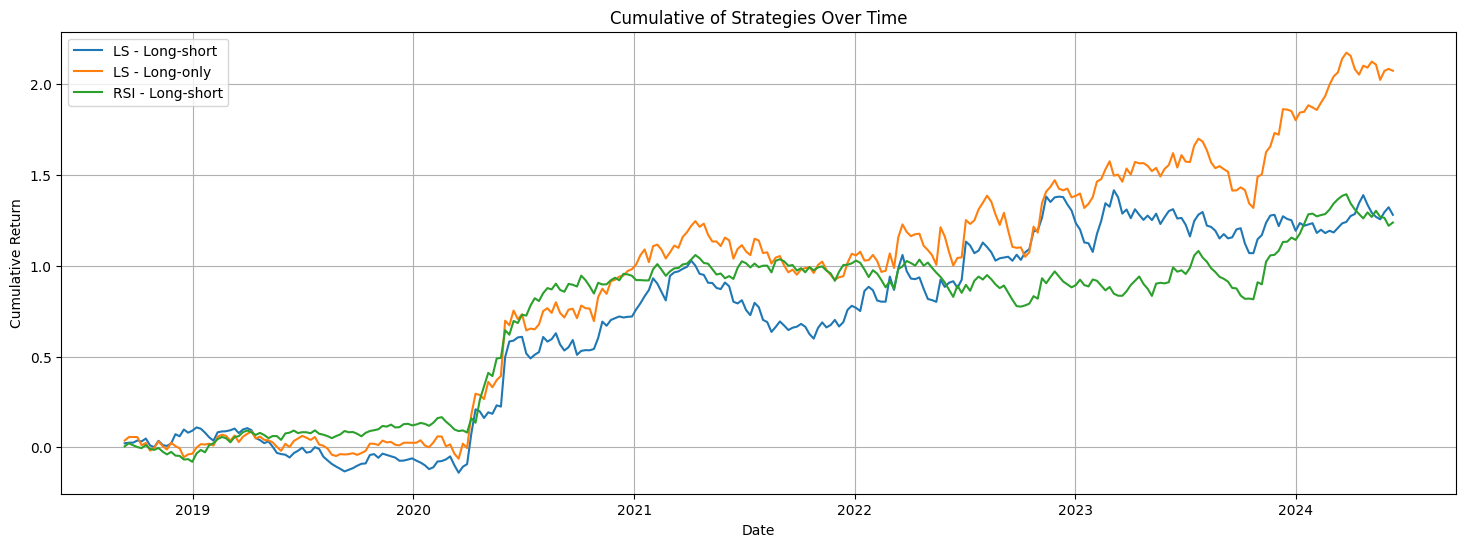

In [43]:
plt.figure(figsize=(18, 6))
plt.plot(pd.to_datetime(x["Date"]), x["Cumulative DLS_LS"], label='LS - Long-short')
plt.plot(pd.to_datetime(x["Date"]), x["Cumulative DLS_L"], label='LS - Long-only')
plt.plot(pd.to_datetime(x["Date"]), x["Cumulative RSI_L"], label='RSI - Long-short')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative of Strategies Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
y = st_return[["Cumulative DLS_LS","Cumulative RSI_L","Cumulative DLS_L"]]
y.corr()

,Cumulative DLS_LS,Cumulative RSI_L,Cumulative DLS_L
Cumulative DLS_LS,1.000000,0.898211,0.968779
Cumulative RSI_L,0.898211,1.000000,0.933192
Cumulative DLS_L,0.968779,0.933192,1.000000


In [45]:
import yfinance as yf
import pandas as pd

# Define the ticker and download data
ticker = "^VIX"
vix = yf.download(ticker, start="2018-06-16", end="2024-06-10")

# Resample to weekly frequency, using 'W-FRI' to ensure the weeks end on Friday
vix_weekly = vix.resample('W-Mon').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

[*********************100%%**********************]  1 of 1 completed


In [46]:
# Define the ticker and download data
ticker = "^TNX"
tnx = yf.download(ticker, start="2018-06-16", end="2024-06-10")

# Resample to weekly frequency, using 'W-FRI' to ensure the weeks end on Friday
tnx_weekly = tnx.resample('W-Mon').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

[*********************100%%**********************]  1 of 1 completed


In [47]:
features = pd.merge(vix_weekly["Close"], tnx_weekly["Close"], left_index=True, right_index= True)

In [48]:
data1["Date"] = pd.to_datetime(data1["Date"])
data1.set_index("Date", inplace=True)
data1

,DLS_LS,Cumulative DLS_LS,RSI_L,Cumulative RSI_L,DLS_L,Cumulative DLS_L
Date,,,,,,
2018-09-10,0.010467,0.022373,0.005808,0.005808,0.003160,0.037468
2018-09-17,0.003039,0.025480,0.016523,0.022428,0.018610,0.056775
2018-09-24,0.000553,0.026047,-0.010899,0.011284,0.000580,0.057388
2018-10-01,0.011310,0.037652,-0.009725,0.001449,-0.000912,0.056424
2018-10-08,-0.004806,0.032665,-0.005805,-0.004363,-0.042249,0.011791
...,...,...,...,...,...,...
2024-05-13,-0.009985,1.269550,0.014971,1.302873,-0.005181,2.108482
2024-05-20,-0.006017,1.255893,-0.014575,1.269309,-0.027233,2.023828
2024-05-27,0.017523,1.295423,-0.002258,1.264184,0.016447,2.073563


In [49]:
data = pd.concat([data1, features], axis = 1)
data.dropna(inplace = True)

In [50]:
data = data.drop(["Cumulative DLS_LS","Cumulative RSI_L","Cumulative DLS_L"], axis = 1)
data

,DLS_LS,RSI_L,DLS_L,Close_x,Close_y
Date,,,,,
2018-09-10,0.010467,0.005808,0.003160,14.16,2.937
2018-09-17,0.003039,0.016523,0.018610,13.68,3.001
2018-09-24,0.000553,-0.010899,0.000580,12.20,3.078
2018-10-01,0.011310,-0.009725,-0.000912,12.00,3.080
2018-10-08,-0.004806,-0.005805,-0.042249,15.69,3.233
...,...,...,...,...,...
2024-05-13,-0.009985,0.014971,-0.005181,13.60,4.481
2024-05-20,-0.006017,-0.014575,-0.027233,12.15,4.437
2024-05-27,0.017523,-0.002258,0.016447,11.93,4.467


In [51]:
data.columns = ["Strategy1", "Strategy2","Strategy3", "VIX","10Y_Treasury"]
data

,Strategy1,Strategy2,Strategy3,VIX,10Y_Treasury
Date,,,,,
2018-09-10,0.010467,0.005808,0.003160,14.16,2.937
2018-09-17,0.003039,0.016523,0.018610,13.68,3.001
2018-09-24,0.000553,-0.010899,0.000580,12.20,3.078
2018-10-01,0.011310,-0.009725,-0.000912,12.00,3.080
2018-10-08,-0.004806,-0.005805,-0.042249,15.69,3.233
...,...,...,...,...,...
2024-05-13,-0.009985,0.014971,-0.005181,13.60,4.481
2024-05-20,-0.006017,-0.014575,-0.027233,12.15,4.437
2024-05-27,0.017523,-0.002258,0.016447,11.93,4.467


In [52]:
data.dropna(inplace = True)

##### <b>Optimization

In [53]:
data

,Strategy1,Strategy2,Strategy3,VIX,10Y_Treasury
Date,,,,,
2018-09-10,0.010467,0.005808,0.003160,14.16,2.937
2018-09-17,0.003039,0.016523,0.018610,13.68,3.001
2018-09-24,0.000553,-0.010899,0.000580,12.20,3.078
2018-10-01,0.011310,-0.009725,-0.000912,12.00,3.080
2018-10-08,-0.004806,-0.005805,-0.042249,15.69,3.233
...,...,...,...,...,...
2024-05-13,-0.009985,0.014971,-0.005181,13.60,4.481
2024-05-20,-0.006017,-0.014575,-0.027233,12.15,4.437
2024-05-27,0.017523,-0.002258,0.016447,11.93,4.467


In [54]:
data["VIX_MA_4"] = data["VIX"].rolling(window=4).mean()
data["10Y_MA_4"] = data["10Y_Treasury"].rolling(window=4).mean()
data["10Y_diff"] = data["10Y_Treasury"].diff()
data["Equally Weighted"] = (data["Strategy1"] / 3) + (data["Strategy2"] / 3) + (data["Strategy2"] / 3)
data['Equally Weighted - Cumulative'] = (1 + data['Equally Weighted']).cumprod() - 1
data.dropna(inplace = True)
data

,Strategy1,Strategy2,Strategy3,VIX,10Y_Treasury,VIX_MA_4,10Y_MA_4,10Y_diff,Equally Weighted,Equally Weighted - Cumulative
Date,,,,,,,,,,
2018-10-01,0.011310,-0.009725,-0.000912,12.000000,3.080,13.0100,3.02400,0.002,-0.002713,0.009512
2018-10-08,-0.004806,-0.005805,-0.042249,15.690000,3.233,13.3925,3.09800,0.153,-0.005472,0.003988
2018-10-15,0.015331,0.017085,0.011988,21.299999,3.163,15.2975,3.13850,-0.070,0.016501,0.020555
2018-10-22,-0.036113,-0.021000,-0.040840,19.639999,3.196,17.1575,3.16800,0.033,-0.026038,-0.006018
2018-10-29,-0.009863,-0.005249,0.016006,24.700001,3.087,20.3325,3.16975,-0.109,-0.006787,-0.012765
...,...,...,...,...,...,...,...,...,...,...
2024-05-13,-0.009985,0.014971,-0.005181,13.600000,4.481,14.6750,4.55175,-0.008,0.006653,1.348497
2024-05-20,-0.006017,-0.014575,-0.027233,12.150000,4.437,13.4775,4.50525,-0.044,-0.011722,1.320967
2024-05-27,0.017523,-0.002258,0.016447,11.930000,4.467,12.7925,4.46850,0.030,0.004336,1.331029


In [55]:
from scipy.optimize import minimize

def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return (portfolio_return - risk_free_rate) / portfolio_std_dev

def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate)

def optimize_weights(expected_returns, cov_matrix, risk_free_rate):
    num_assets = len(expected_returns)
    args = (expected_returns, cov_matrix, risk_free_rate)
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets * [1. / num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

In [56]:
data

,Strategy1,Strategy2,Strategy3,VIX,10Y_Treasury,VIX_MA_4,10Y_MA_4,10Y_diff,Equally Weighted,Equally Weighted - Cumulative
Date,,,,,,,,,,
2018-10-01,0.011310,-0.009725,-0.000912,12.000000,3.080,13.0100,3.02400,0.002,-0.002713,0.009512
2018-10-08,-0.004806,-0.005805,-0.042249,15.690000,3.233,13.3925,3.09800,0.153,-0.005472,0.003988
2018-10-15,0.015331,0.017085,0.011988,21.299999,3.163,15.2975,3.13850,-0.070,0.016501,0.020555
2018-10-22,-0.036113,-0.021000,-0.040840,19.639999,3.196,17.1575,3.16800,0.033,-0.026038,-0.006018
2018-10-29,-0.009863,-0.005249,0.016006,24.700001,3.087,20.3325,3.16975,-0.109,-0.006787,-0.012765
...,...,...,...,...,...,...,...,...,...,...
2024-05-13,-0.009985,0.014971,-0.005181,13.600000,4.481,14.6750,4.55175,-0.008,0.006653,1.348497
2024-05-20,-0.006017,-0.014575,-0.027233,12.150000,4.437,13.4775,4.50525,-0.044,-0.011722,1.320967
2024-05-27,0.017523,-0.002258,0.016447,11.930000,4.467,12.7925,4.46850,0.030,0.004336,1.331029


In [57]:
# Calculate optimal weights using entire historical data
historical_weights = []

for i in range(len(data)):
    returns_window = data[['Strategy1', 'Strategy2', 'Strategy3']].iloc[
                     max(i - 16, 0):i + 1]  # Using the last year of data
    if len(returns_window) < 16:  # Skip if not enough data
        continue
    expected_returns = returns_window.mean()
    cov_matrix = returns_window.cov()
    optimal_weights = optimize_weights(expected_returns, cov_matrix, 0.01)  # Assume a risk-free rate of 1%
    historical_weights.append(optimal_weights)

historical_weights_df = pd.DataFrame(historical_weights, index=data.index[len(data) - len(historical_weights):],
                                     columns=['w1', 'w2', 'w3'])

print(len(historical_weights_df))
historical_weights_df["w1"].sum(), historical_weights_df["w2"].sum(), historical_weights_df["w3"].sum()

display(historical_weights_df)

feature = data[['VIX', 'VIX_MA_4', '10Y_Treasury', '10Y_MA_4']].iloc[len(data) - len(historical_weights):].shift(-1)
feature.dropna(inplace = True)
target = historical_weights_df

target = target.iloc[1:]

283


,w1,w2,w3
Date,,,
2019-01-14,1.000000e+00,2.492451e-14,1.873501e-14
2019-01-21,1.000000e+00,3.724798e-14,8.087975e-14
2019-01-28,0.000000e+00,1.998401e-15,1.000000e+00
2019-02-04,0.000000e+00,0.000000e+00,1.000000e+00
2019-02-11,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...
2024-05-13,5.759282e-16,0.000000e+00,1.000000e+00
2024-05-20,0.000000e+00,9.020562e-17,1.000000e+00
2024-05-27,5.551115e-17,0.000000e+00,1.000000e+00


In [58]:
historical_weights_df

,w1,w2,w3
Date,,,
2019-01-14,1.000000e+00,2.492451e-14,1.873501e-14
2019-01-21,1.000000e+00,3.724798e-14,8.087975e-14
2019-01-28,0.000000e+00,1.998401e-15,1.000000e+00
2019-02-04,0.000000e+00,0.000000e+00,1.000000e+00
2019-02-11,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...
2024-05-13,5.759282e-16,0.000000e+00,1.000000e+00
2024-05-20,0.000000e+00,9.020562e-17,1.000000e+00
2024-05-27,5.551115e-17,0.000000e+00,1.000000e+00


In [59]:
w1_dominate = historical_weights_df[historical_weights_df["w1"] > 0.3]
w2_dominate = historical_weights_df[historical_weights_df["w2"] > 0.3]
w3_dominate = historical_weights_df[historical_weights_df["w3"] > 0.3]

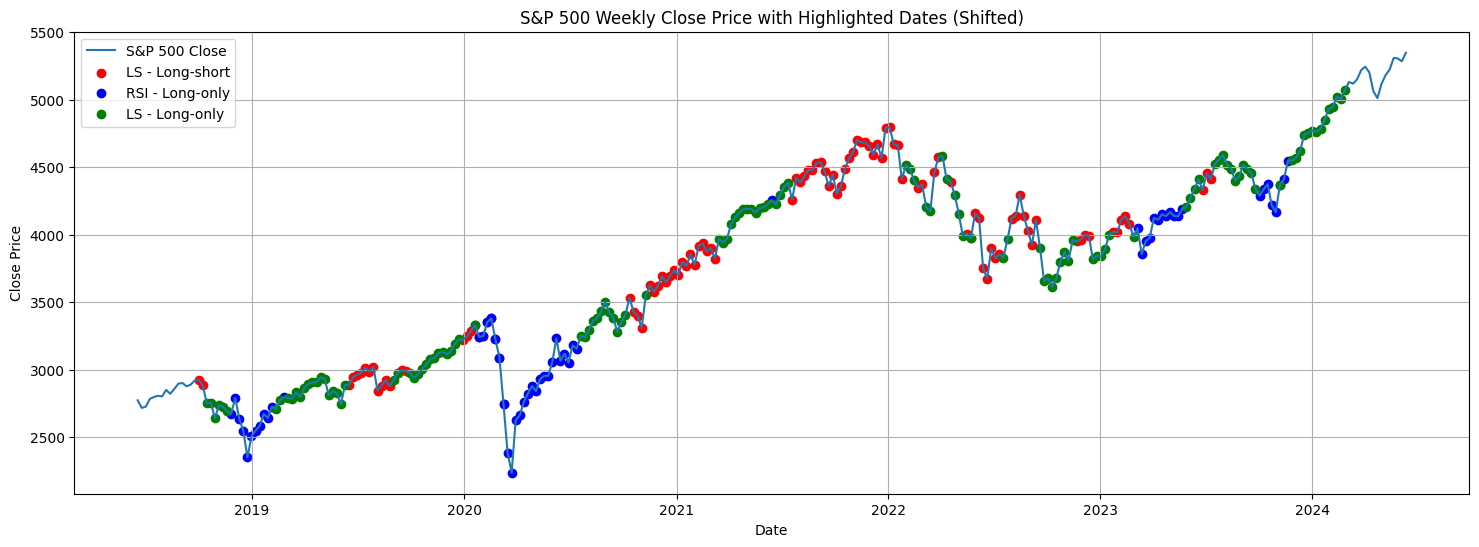

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sp500_weekly, w1_dominate, w2_dominate, and w3_dominate are already defined

# Shift indices back by 16 weeks
w1_dominate_shifted = w1_dominate.copy()
w1_dominate_shifted.index = w1_dominate.index - pd.DateOffset(weeks=15)

w2_dominate_shifted = w2_dominate.copy()
w2_dominate_shifted.index = w2_dominate.index - pd.DateOffset(weeks=15)

w3_dominate_shifted = w3_dominate.copy()
w3_dominate_shifted.index = w3_dominate.index - pd.DateOffset(weeks=15)

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(sp500_weekly.index, sp500_weekly['Close'], label='S&P 500 Close')

# Highlight the dates from the shifted dataframes
plt.scatter(w1_dominate_shifted.index, sp500_weekly.loc[w1_dominate_shifted.index, 'Close'], color='red', label='LS - Long-short')
plt.scatter(w2_dominate_shifted.index, sp500_weekly.loc[w2_dominate_shifted.index, 'Close'], color='blue', label='RSI - Long-only')
plt.scatter(w3_dominate_shifted.index, sp500_weekly.loc[w3_dominate_shifted.index, 'Close'], color='green', label='LS - Long-only')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Weekly Close Price with Highlighted Dates (Shifted)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<Axes: xlabel='Date'>

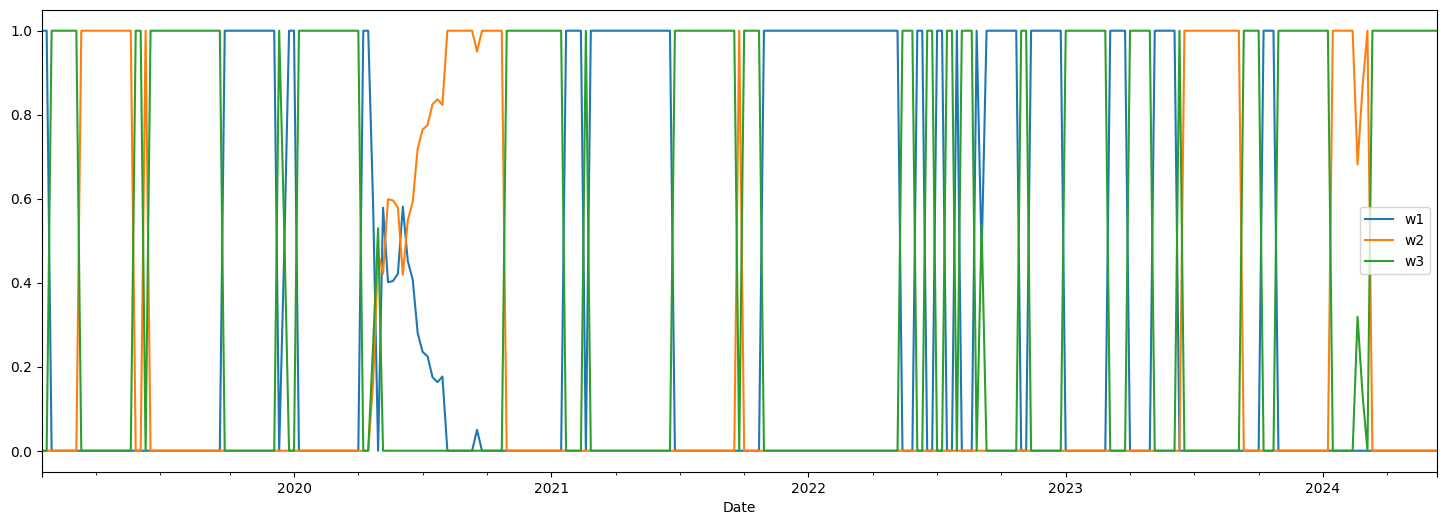

In [61]:
historical_weights_df.plot(figsize= [18,6])

In [62]:
historical_weights_df.sum()

w1    104.056611
w2     53.630868
w3    125.312520
dtype: float64

In [66]:
feature.shape, target.shape

((267, 4), (267, 3))

In [65]:
feature = feature.iloc[:-15]

In [64]:
target = target.shift(-15).dropna()
target

,w1,w2,w3
Date,,,
2019-01-21,1.158585e-14,1.000000e+00,1.818823e-13
2019-01-28,0.000000e+00,1.000000e+00,0.000000e+00
2019-02-04,0.000000e+00,1.000000e+00,0.000000e+00
2019-02-11,0.000000e+00,8.326673e-17,1.000000e+00
2019-02-18,1.602469e-16,0.000000e+00,1.000000e+00
...,...,...,...
2024-01-29,5.759282e-16,0.000000e+00,1.000000e+00
2024-02-05,0.000000e+00,9.020562e-17,1.000000e+00
2024-02-12,5.551115e-17,0.000000e+00,1.000000e+00


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Train a regression model to predict strategy weights
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print("Training score:", model.score(X_train, y_train))
print("Testing score:", model.score(X_test, y_test))

Training score: 0.9154096693153333
Testing score: 0.4817542120393817


Sharpe Ratio: 1.62215555865994


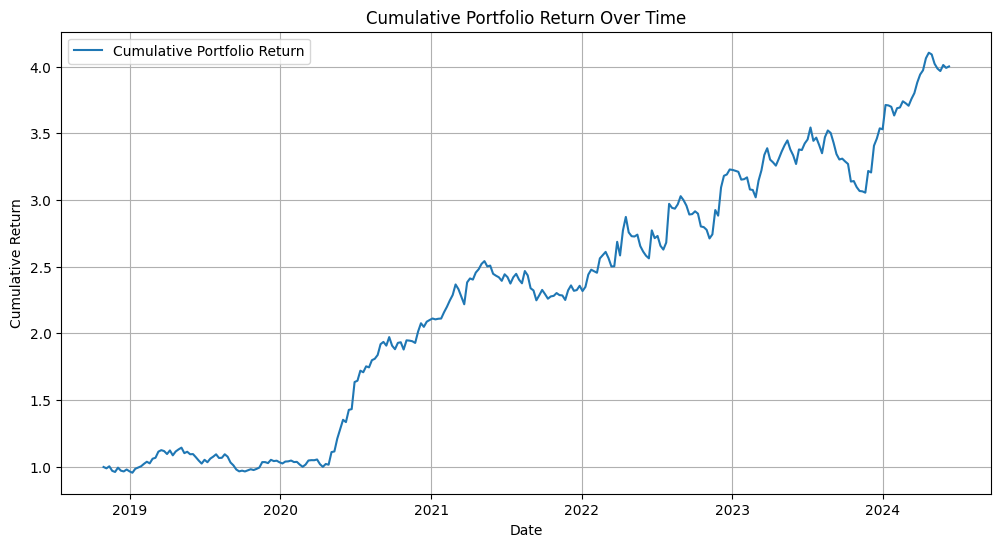

In [72]:
portfolio_returns = []
predicted_weights_dict = {}
predicted_weights_dict['index'] = []
predicted_weights_dict['weight_1'] = []
predicted_weights_dict['weight_2'] = []
predicted_weights_dict['weight_3'] = []

for i in range(len(data) - 4):  # -4 to ensure we have enough data for VIX_MA_4 and 10Y_MA_4
    # Get the current week's data
    current_vix = data['VIX'].iloc[i]
    current_vix_ma4 = data['VIX_MA_4'].iloc[i]
    current_10y = data['10Y_Treasury'].iloc[i]
    current_10y_ma4 = data['10Y_MA_4'].iloc[i]

    # Create a DataFrame with the current VIX value and its moving average
    current_data = pd.DataFrame({
        'VIX': [current_vix],
        'VIX_MA_4': [current_vix_ma4],
        '10Y_Treasury': [current_10y],
        '10Y_MA_4': [current_10y_ma4]
    })

    # Predict strategy weights for the current week
    predicted_weights = model.predict(current_data)

    # Calculate the portfolio return for the current week
    actual_returns = data[['Strategy1', 'Strategy2', 'Strategy3']].iloc[i].values
    weekly_return = np.dot(predicted_weights[0], actual_returns)
    portfolio_returns.append(weekly_return)
    predicted_weights_dict['index'].append(i)
    predicted_weights_dict['weight_1'].append(predicted_weights[0][0])
    predicted_weights_dict['weight_2'].append(predicted_weights[0][1])
    predicted_weights_dict['weight_3'].append(predicted_weights[0][2])
# Create a DataFrame to hold the portfolio returns
portfolio_returns_df = pd.DataFrame(portfolio_returns, index=data.index[4:], columns=['Portfolio Return'])

# Plot the cumulative returns
portfolio_returns_df['Cumulative Return'] = (1 + portfolio_returns_df['Portfolio Return']).cumprod()

# Calculate Sharpe ratio
average_return = portfolio_returns_df['Portfolio Return'].mean()
return_std_dev = portfolio_returns_df['Portfolio Return'].std()
risk_free_rate = 0  # Example annual risk-free rate of 2% converted to weekly

sharpe_ratio = (((1 + average_return) ** 52-1) - risk_free_rate) / (return_std_dev * np.sqrt(52))
print("Sharpe Ratio:", sharpe_ratio)


plt.figure(figsize=(12, 6))
plt.plot(portfolio_returns_df['Cumulative Return'], label='Cumulative Portfolio Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Portfolio Return Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
data.index[4:]

DatetimeIndex(['2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31',
               ...
               '2024-04-08', '2024-04-15', '2024-04-22', '2024-04-29',
               '2024-05-06', '2024-05-13', '2024-05-20', '2024-05-27',
               '2024-06-03', '2024-06-10'],
              dtype='datetime64[ns]', name='Date', length=294, freq='W-MON')

In [73]:
predicted_weight = pd.DataFrame(predicted_weights_dict, index = data.index[:-4])
display(predicted_weight.sum())
display(historical_weights_df.sum())


index       43071.000000
weight_1      114.962742
weight_2       53.533389
weight_3      125.503869
dtype: float64

w1    104.056611
w2     53.630868
w3    125.312520
dtype: float64

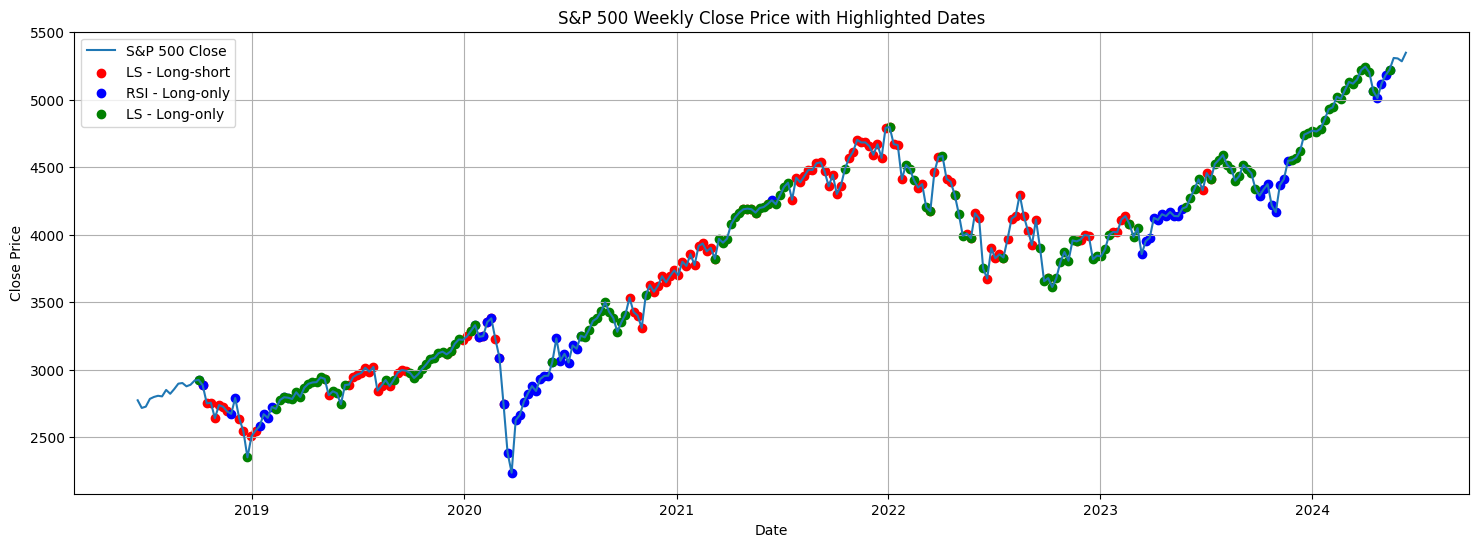

In [74]:
w1_dominate_predicted = predicted_weight[predicted_weight["weight_1"] > 0.3]
w2_dominate_predicted = predicted_weight[predicted_weight["weight_2"] > 0.3]
w3_dominate_predicted = predicted_weight[predicted_weight["weight_3"] > 0.3]

plt.figure(figsize=(18, 6))
plt.plot(sp500_weekly.index, sp500_weekly['Close'], label='S&P 500 Close')

# Highlight the dates from the three dataframes
plt.scatter(w1_dominate_predicted.index, sp500_weekly.loc[w1_dominate_predicted.index, 'Close'], color='red', label='LS - Long-short')
plt.scatter(w2_dominate_predicted.index, sp500_weekly.loc[w2_dominate_predicted.index, 'Close'], color='blue', label='RSI - Long-only')
plt.scatter(w3_dominate_predicted.index, sp500_weekly.loc[w3_dominate_predicted.index, 'Close'], color='green', label='LS - Long-only')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Weekly Close Price with Highlighted Dates')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [22]:
import yfinance as yf
import pandas as pd

# Define the ticker and download data
ticker = "^GSPC"
sp500 = yf.download(ticker, start="2018-06-16", end="2024-06-10")

# Resample to weekly frequency, using 'W-FRI' to ensure the weeks end on Friday
sp500_weekly = sp500.resample('W-Mon').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

sp500_weekly['Return'] = sp500_weekly['Close'].pct_change()
sp500_weekly['Cumulative Return'] = (1 + sp500_weekly['Return']).cumprod() - 1

[*********************100%%**********************]  1 of 1 completed


In [75]:
def perf_m_s(df, sp500 ,data, plt_title):

    df.reset_index(inplace = True)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace = True)
    # 1. Calculate average daily return
    average_daily_return = df['Portfolio Return'].mean()
    # 2. Calculate volatility (standard deviation of daily returns)
    volatility = df['Portfolio Return'].std()
    # Annualize the volatility (assuming 252 trading days in a year)
    annualized_volatility = volatility * np.sqrt(52)
    # 3. Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = (((1 + average_daily_return)** 52 - 1) / annualized_volatility)
    # 4. Calculate cumulative return
    df['Cumulative Return'] = (1 + df['Portfolio Return']).cumprod() - 1
    cumulative_return = df["Cumulative Return"].iloc[-1]
    # 5. Calculate maximum drawdown
    cumulative_return_series = (1 + df['Portfolio Return']).cumprod()
    rolling_max = cumulative_return_series.cummax()
    drawdown = cumulative_return_series / rolling_max - 1
    max_drawdown = drawdown.min()
    end_date = drawdown.idxmin()
    start_date = (cumulative_return_series[:end_date]).idxmax()
    # Create a dataframe with the calculated metrics
    metrics = {
        'Metric': ['Average Weekly Return', 'Volatility (Weekly)', 'Volatility (Annualized)', 
                'Cumulative Return', 'Sharpe Ratio', 'Maximum Drawdown'],
        'Value': [average_daily_return, volatility, annualized_volatility, 
                cumulative_return, sharpe_ratio, max_drawdown]
    }

    # SP500
    # 1. Calculate average daily return
    average_daily_return_2 = sp500['Return'].mean()
    # 2. Calculate volatility (standard deviation of daily returns)
    volatility_2 = sp500['Return'].std()
    # Annualize the volatility (assuming 252 trading days in a year)
    annualized_volatility_2 = volatility_2 * np.sqrt(252)
    # 3. Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio_2 = (average_daily_return_2 / volatility_2) * np.sqrt(252)
    # 4. Calculate cumulative return
    sp500['Cumulative Return'] = (1 + sp500['Return']).cumprod() - 1
    cumulative_return_2 = sp500["Cumulative Return"].iloc[-1]
    # 5. Calculate maximum drawdown
    cumulative_return_series_2 = (1 + sp500['Return']).cumprod()
    rolling_max_2 = cumulative_return_series_2.cummax()
    drawdown_2 = cumulative_return_series_2 / rolling_max_2 - 1
    max_drawdown_2 = drawdown_2.min()
    end_date_2 = drawdown_2.idxmin()
    start_date_2 = (cumulative_return_series_2[:end_date_2]).idxmax()

    metrics_df = pd.DataFrame(metrics)

    # Equally weighted
    # 1. Calculate average daily return
    average_daily_return_3 = data['Equally Weighted'].mean()
    # 2. Calculate volatility (standard deviation of daily returns)
    volatility_3 = data['Equally Weighted'].std()
    # Annualize the volatility (assuming 252 trading days in a year)
    annualized_volatility_3 = volatility_3 * np.sqrt(52)
    # 3. Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio_3 = (((1 + average_daily_return_3)** 52 - 1) / annualized_volatility_3)
    # 4. Calculate cumulative return
    cumulative_return_3 = (1 + data['Equally Weighted']).cumprod() - 1
    cumulative_return_3 = cumulative_return_3.iloc[-1]
    # 5. Calculate maximum drawdown
    cumulative_return_series_3 = (1 + data['Equally Weighted']).cumprod()
    rolling_max_3 = cumulative_return_series_3.cummax()
    drawdown_3 = cumulative_return_series_3 / rolling_max_3 - 1
    max_drawdown_3 = drawdown_3.min()
    end_date_3 = drawdown_3.idxmin()
    start_date_3 = (cumulative_return_series_3[:end_date]).idxmax()
    # Create a dataframe with the calculated metrics
    metrics_3 = {
        'Metric': ['Average Weekly Return', 'Volatility (Weekly)', 'Volatility (Annualized)', 
                'Cumulative Return', 'Sharpe Ratio', 'Maximum Drawdown'],
        'Value': [average_daily_return_3, volatility_3, annualized_volatility_3, 
                cumulative_return_3, sharpe_ratio_3, max_drawdown_3]
    }
    metrics_3_df = pd.DataFrame(metrics_3)
    display(metrics_3_df)

    plt.figure(figsize=[18, 6])
    plt.plot(df.index, df['Cumulative Return'], label='Optimized Portfolio')
    plt.plot(data.index, data['Equally Weighted - Cumulative'], label = 'Equally Weighted')
    plt.plot(sp500.index, sp500['Cumulative Return'], label = "SP500")
    plt.axvspan(start_date, end_date, color='red', alpha=0.3, label='Max Drawdown Period')
    plt.axvspan(start_date_2, end_date_2, color='red', alpha=0.1, label='Max Drawdown Period - SP500')
    plt.title(plt_title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()

    display(metrics_df)

    return metrics_df

,Metric,Value
0,Average Weekly Return,0.002946
1,Volatility (Weekly),0.019063
2,Volatility (Annualized),0.137462
3,Cumulative Return,1.280862
4,Sharpe Ratio,1.202469
5,Maximum Drawdown,-0.115947


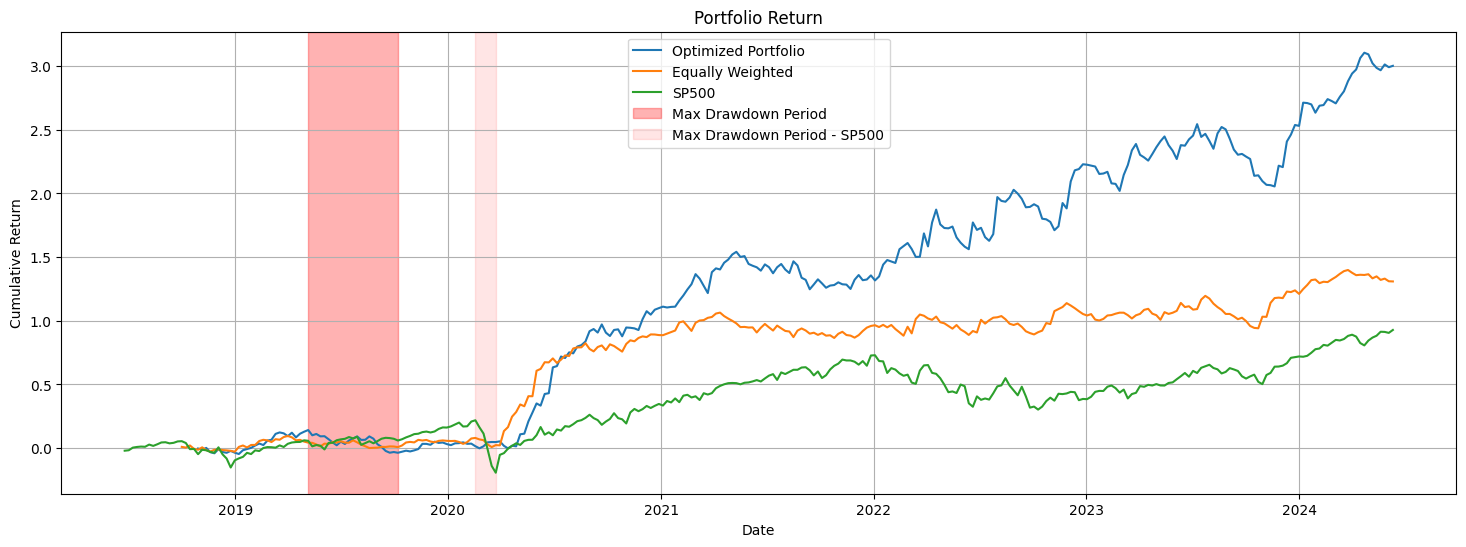

,Metric,Value
0,Average Weekly Return,0.005045
1,Volatility (Weekly),0.025573
2,Volatility (Annualized),0.184406
3,Cumulative Return,3.002078
4,Sharpe Ratio,1.622156
5,Maximum Drawdown,-0.156386


In [76]:
metric = perf_m_s(portfolio_returns_df, sp500_weekly, data, "Portfolio Return")